### Housing Price Estimation

Here, we will train a machine learning model to predict housing price based on the below given features. We will use multivariate linear regression to train the model.
- **Feature**: Area of house (measured in square foot), Number of bedrooms, Number of bathrooms, Number of stories in the building, Number of parking spaces.
- **Target**: Price of the house (in $)

The feature values will be normalized using `z-score normalization`.
We will follow the `90-10` rule for segregating the dataset into training and validation sets i.e., 90% of the data will be used for training the model and 10% of the dataset will be used for validating the trained model.

In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np
from models import LinearRegression
from utils import Normalization

df = pd.read_csv('./datasets/housing.csv')
print(df.head())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [2]:
total_rows = df.shape[0]
train_rows = math.ceil(0.9 * total_rows)
training_set = df[:train_rows]
validation_set = df[train_rows:]
print(f"There are {training_set.shape[0]} row(s) in the training set.")
print(f"There are {validation_set.shape[0]} row(s) in the validation set.")

There are 491 row(s) in the training set.
There are 54 row(s) in the validation set.


In [3]:
x_train = training_set['area'].to_numpy(dtype=float)
x_train = np.append(x_train, training_set['bedrooms'].to_numpy(dtype=float))
x_train = np.append(x_train, training_set['bathrooms'].to_numpy(dtype=float))
x_train = np.append(x_train, training_set['stories'].to_numpy(dtype=float))
x_train = np.append(x_train, training_set['parking'].to_numpy(dtype=float))
y_train = training_set['price'].to_numpy(dtype=float)
m = training_set.shape[0]
n = 5
x_train = x_train.reshape((m, n))
y_train = y_train.reshape((m, 1))
x_norm = Normalization.zscore(x_train)

Model parameters: w = [[284089.33699595]
 [266409.61169459]
 [304633.41020995]
 [255797.95672267]
 [267751.73506483]], b = 4984612.445847845 | Minimum cost value = 13,250,409,552,962.406


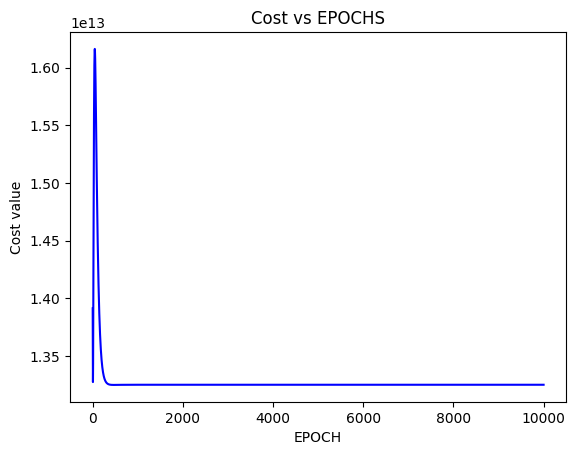

In [4]:
np.random.seed(20)
b = np.random.randn()
w = np.random.randn(n, 1)
model = LinearRegression(0.01, 10000, 335)
cost_values = model.train_gd(x_norm, y_train)
print(f"Model parameters: w = {model.w_final}, b = {model.b_final} | Minimum cost value = {model.cost_final:,}")

plt.plot(cost_values, 'b')
plt.title("Cost vs EPOCHS")
plt.xlabel("EPOCH")
plt.ylabel("Cost value")
plt.show()

In [5]:
x_validate = validation_set['area'].to_numpy(dtype=float)
x_validate = np.append(x_validate, validation_set['bedrooms'].to_numpy(dtype=float))
x_validate = np.append(x_validate, validation_set['bathrooms'].to_numpy(dtype=float))
x_validate = np.append(x_validate, validation_set['stories'].to_numpy(dtype=float))
x_validate = np.append(x_validate, validation_set['parking'].to_numpy(dtype=float))
y_validate = validation_set['price'].to_numpy(dtype=float)
m_validate = validation_set.shape[0]
n_validate = 5
x_validate = x_validate.reshape((m_validate, n_validate))
y_validate = y_validate.reshape((m_validate, 1))
xv_norm = Normalization.zscore(x_validate)

cost_validate = model.validate(xv_norm, y_validate)
print(f"The minimum cost obtained from training set is {model.cost_final:,}")
print(f"The cost value obtained from validation set is {cost_validate:,}.")

if cost_validate > model.cost_final:
    percent_increase = ((cost_validate / model.cost_final) * 100) - 100
    print(f"Validation cost is {percent_increase:.2f}% higher than the training cost.")
else:
    percent_increase = ((model.cost_final / cost_validate) * 100) - 100
    print(f"Training cost is {percent_increase:.2f}% higher than the validation cost.")

The minimum cost obtained from training set is 13,250,409,552,962.406
The cost value obtained from validation set is 16,865,398,631,082.88.
Validation cost is 27.28% higher than the training cost.
